# King County Housing Market Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
linreg = LinearRegression()
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
data = data.drop('id', axis=1)

## Convert categoricals to int/floats

In [8]:
cats = ['waterfront', 'grade', 'view', 'condition']

In [9]:
data['waterfront'].fillna('NO', inplace=True)

### Grade

In [10]:
data.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [11]:
data['grade'] = data['grade'].str[:2]
data.grade = data.grade.astype(float)

In [12]:
data.grade

0        7.0
1        7.0
2        6.0
3        7.0
4        8.0
        ... 
21592    8.0
21593    8.0
21594    7.0
21595    8.0
21596    7.0
Name: grade, Length: 21597, dtype: float64

### View

In [13]:
data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
#Some values are missing and are liekly none (the mode and possibly skipped because of it being none). 
data.view = data.view.fillna('NONE')

In [15]:
view_data = pd.get_dummies(data['view'], prefix='view', drop_first=True)

In [16]:
view_data

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
21592,0,0,0,1
21593,0,0,0,1
21594,0,0,0,1
21595,0,0,0,1


In [17]:
#lb_make = LabelEncoder()

#origin_encoded = lb_make.fit_transform(cat)

### Floors

In [18]:
#floors look good.
data.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### Waterfront

In [19]:
data.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [20]:
#Convert no to 0, yes to 1

In [21]:
data.waterfront = (data['waterfront'] == 'YES').astype(int)

In [22]:
data.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,NONE,Average,11.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,NONE,Average,7.0,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,NONE,Average,7.0,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0,NONE,Average,7.0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0,NONE,Average,7.0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Condition

In [23]:
data.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [24]:
condition_data = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)

In [80]:
condition_data
        

,cond_Fair,cond_Good,cond_Poor,cond_Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [26]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [27]:
#data['latest_update'] = data['yr_renovated']
#data

In [28]:
#data['latest_update'] = data[['yr_built', 'yr_renovated']]
#data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int32  
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  float64
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [30]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2570.0        1
2810.0        1
861.0         1
602.0         1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [31]:
#convert to numbers, treast as cont
data.grade.value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

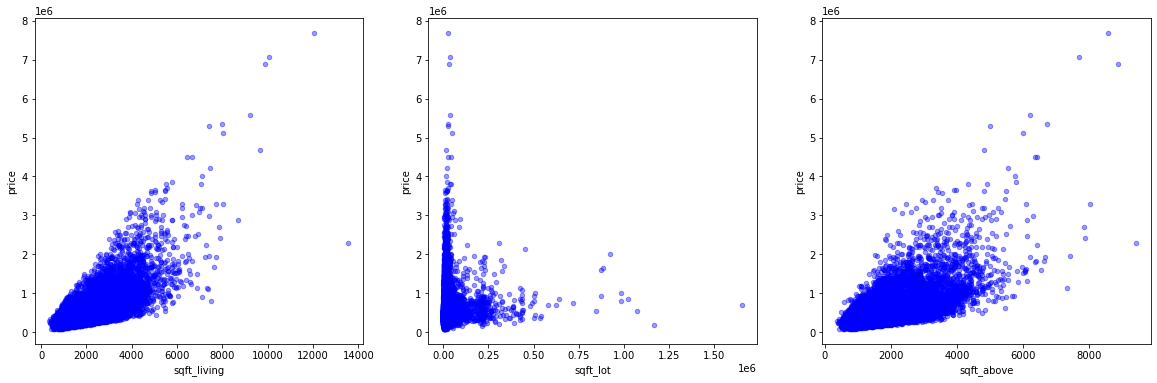

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

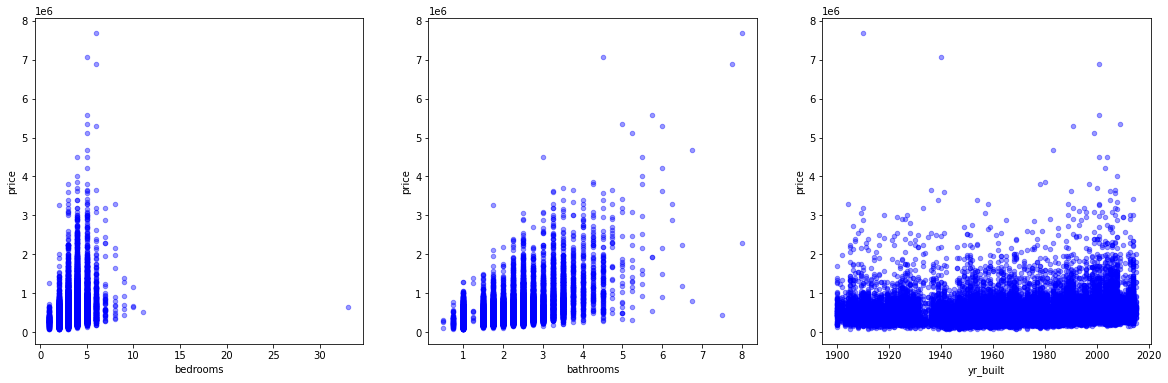

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

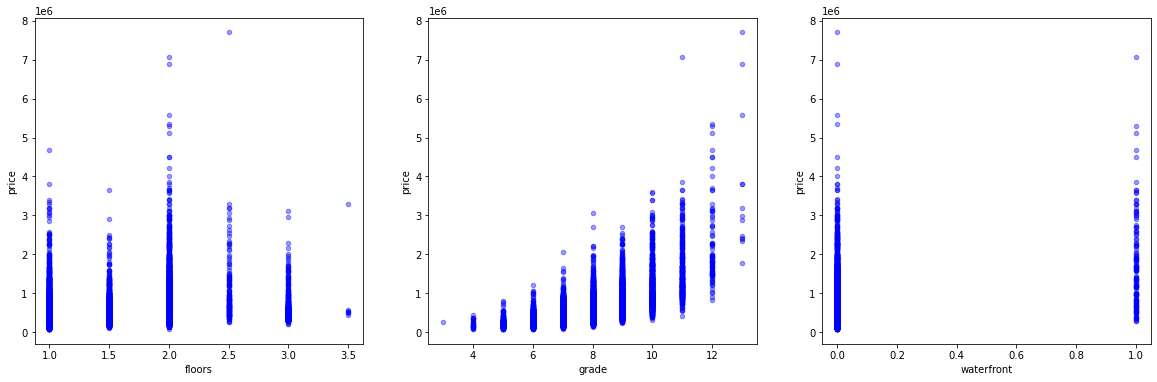

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['floors', 'grade', 'waterfront'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

## Join DataFrames

In [81]:
data = pd.concat([data, condition_data], axis=1)

In [82]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_Fair,cond_Good,cond_Poor,cond_Very Good
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,0,0,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,NaN,98028,47.7379,-122.233,2720,8062,0,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,...,0.0,98103,47.6993,-122.346,1530,1509,0,0,0,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,...,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,...,0.0,98144,47.5944,-122.299,1020,2007,0,0,0,0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,...,0.0,98027,47.5345,-122.069,1410,1287,0,0,0,0


### Set X and y

In [83]:
y = data['price']
categoricals = ['waterfront', 'zipcode', 'view', 'grade']
#X = data[['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms', 'yr_built','floors', 'zipcode', 'grade', 'waterfront']]
X = data[['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'grade', 'waterfront', 'cond_Fair', 'cond_Good', 'cond_Poor', 'cond_Very Good']]
#X = ['floors', 'waterfront', 'yr_built', 'zipcode', 'view', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms']
#convert view, grade, 'sqft_basement' - add to cont


## Seperate data for test/train

In [84]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [89]:
X_train.isna().sum()

sqft_living       0
sqft_lot          0
sqft_above        0
bedrooms          0
bathrooms         0
yr_built          0
floors            0
grade             0
waterfront        0
cond_Fair         0
cond_Good         0
cond_Poor         0
cond_Very Good    0
dtype: int64

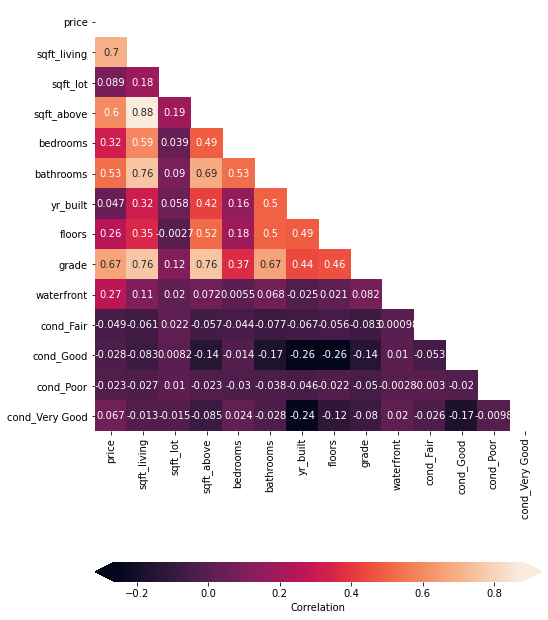

In [86]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(8, 12))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.64952386, 0.66380523, 0.62992329])

## Best Features

# Logs of data

In [37]:
#log_names = [f'{column}_log' for column in X.columns]

#data_log = np.log(X)
#data_log.columns = log_names

In [38]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [39]:
#data_log_norm = data_log.apply(normalize)

#data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)